### import libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
!curl -o creditscore.csv 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  178k  100  178k    0     0   616k      0 --:--:-- --:--:-- --:--:--  616k


In [3]:
df = pd.read_csv('creditscore.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [6]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)

In [7]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [8]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [9]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [10]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [11]:
df = df[df.status != 'unk'].reset_index(drop=True)


In [12]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [15]:
del df_train['status']
del df_val['status']
del df_test['status']

In [16]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


### 6.3 Decision trees
- How a decision tree looks like
- Training a decision tree
- Overfitting
- Controlling the size of a tree

In [17]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [18]:
xi = df_train.iloc[0].to_dict()

In [19]:
assess_risk(xi)

'ok'

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [21]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [22]:

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [23]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [25]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6537350754401686

In [26]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [27]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [28]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7054989859726213
val: 0.6685264343319367


In [29]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0



### 6.4 Decision tree learning algorithm
- Finding the best split for one column
- Finding the best split for the entire dataset
- Stopping criteria
- Decision tree learning algorithm

In [30]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [31]:
df_example.sort_values('assets')


,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [32]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]


In [33]:
T = 4000
df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets > T]

display(df_left)
print(df_left.status.value_counts(normalize=True))
display(df_right)
print(df_left.status.value_counts(normalize=True))

,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


In [34]:
from IPython.display import display
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))

    print()

0


,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64



In [35]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [36]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [37]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [38]:
for feature, Ts in thresholds.items():
    print('#####################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()
    print('#####################')

#####################
assets
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

#####################
#####################
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

#####################


### 6.5 Decision trees parameter tuning
- selecting max_depth
- selecting min_samples_leaf

In [39]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.766
   6 -> 0.749
  10 -> 0.681
  15 -> 0.665
  20 -> 0.659
None -> 0.657


In [40]:
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [41]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,max_depth,min_samples_leaf,auc
0,4,1,0.761283
1,4,5,0.761283
2,4,10,0.761283
3,4,15,0.763726
4,4,20,0.760910
5,4,500,0.679842
6,4,100,0.755937
7,4,200,0.747260
8,5,1,0.766938
9,5,5,0.768173


In [42]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.761  0.767  0.748
5                 0.761  0.768  0.762
10                0.761  0.762  0.778
15                0.764  0.772  0.785
20                0.761  0.774  0.774
100               0.756  0.763  0.776
200               0.747  0.759  0.768
500               0.680  0.680  0.680

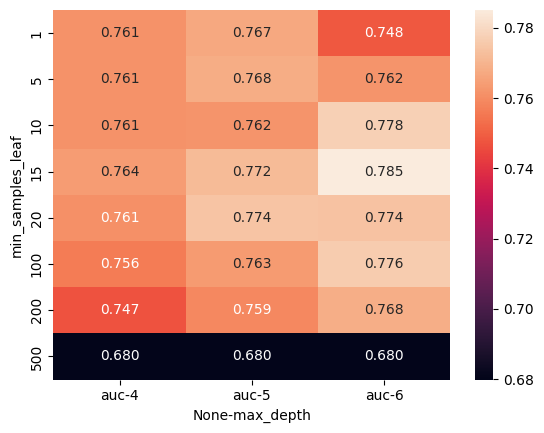

In [43]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f");


In [44]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [45]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- assets <= 4250.00
|   |   |   |   |--- income <= 20.00
|   |   |   |   |   |--- seniority <= 1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- seniority >  1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- income >  20.00
|   |   |   |   |   |--- expenses <= 71.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- expenses >  71.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- assets >  4250.00
|   |   |   |   |--- debt <= 1600.00
|   |   |   |   |   |--- seniority <= 2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- seniority >  2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- debt >  1600.00
|   |   |   |   |   |--- class: 1
|   |   |--- income >  74.50
|   |   |   |--- seniority <= 5.50
|   |   |   |   |--- amount <= 1330.00
|   |   |   |   |   |--- assets <= 3326.00
|   |   |   |   |   |   |--- clas

### 6.6 Ensembles and random forest
- Board of experts
- Ensembling models
- Random forest - ensembling decision trees
- Tuning random forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [48]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

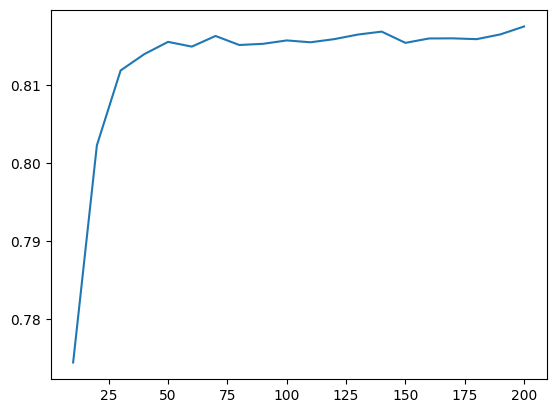

In [49]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [50]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [51]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

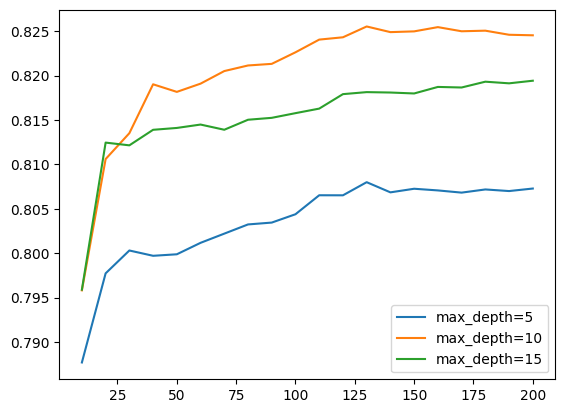

In [52]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend();

In [53]:
max_depth = 10

In [54]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [55]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

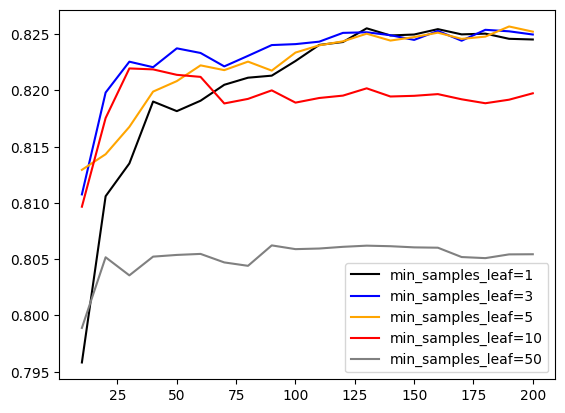

In [56]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [57]:
min_samples_leaf = 3
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

## 6.7 Gradient boosting and XGBoost
- gradient boosting vs random forest
- installing xgboost
- Training the first model
- performance monitoring
- Parsing xgboost monitoring output


In [58]:
import xgboost as xgb 

# xgb.DMatrix is optimised for xgboost 
dtrain = xgb.DMatrix(X_train, 
            label = y_train,
            feature_names = list(dv.get_feature_names_out())
            )

dval =  xgb.DMatrix(X_val, 
            label = y_val,
            feature_names = list(dv.get_feature_names_out())
            )

In [59]:
%%capture output
# train the model 
xgb_params = { 
              'max_depth':6, # size of the tree
              'eta':0.3, # learning rate 
              'min_child_weight':1, #min_samples_leaf_size min no of samples in the leaf node

              'objective':'binary:logistic', # binary classification 
              'nthread':4, # number of threads can parllelize training , no of cpu core 

              'seed':1,
              'verbosity':1, # contril what type of warnings we will receive
           
              'eval_metric':'auc'}

watchlist = [(dtrain,'train'),(dval,'val')] # contains dataset where we want to evaluate our model during train
model = xgb.train(xgb_params, 
                  dtrain,
                  evals = watchlist,
                  verbose_eval = 3, # print output at every 5th step of iteration
                  num_boost_round=200)

In [60]:
print(output.stdout) # model evaluation by each iteration it comes from watchlist

[0]	train-auc:0.86300	val-auc:0.76818
[3]	train-auc:0.90951	val-auc:0.80886
[6]	train-auc:0.93385	val-auc:0.80949
[9]	train-auc:0.94581	val-auc:0.81527
[12]	train-auc:0.95555	val-auc:0.81821
[15]	train-auc:0.96558	val-auc:0.81680
[18]	train-auc:0.97083	val-auc:0.81901
[21]	train-auc:0.97469	val-auc:0.81765
[24]	train-auc:0.98104	val-auc:0.81937
[27]	train-auc:0.98491	val-auc:0.81840
[30]	train-auc:0.98772	val-auc:0.81787
[33]	train-auc:0.99063	val-auc:0.81491
[36]	train-auc:0.99260	val-auc:0.81346
[39]	train-auc:0.99388	val-auc:0.81235
[42]	train-auc:0.99489	val-auc:0.81390
[45]	train-auc:0.99596	val-auc:0.81462
[48]	train-auc:0.99664	val-auc:0.81237
[51]	train-auc:0.99725	val-auc:0.81069
[54]	train-auc:0.99761	val-auc:0.80945
[57]	train-auc:0.99846	val-auc:0.80755
[60]	train-auc:0.99889	val-auc:0.80801
[63]	train-auc:0.99903	val-auc:0.80738
[66]	train-auc:0.99923	val-auc:0.80731
[69]	train-auc:0.99940	val-auc:0.80644
[72]	train-auc:0.99949	val-auc:0.80799
[75]	train-auc:0.99964	val-au

In [61]:
y_pred = model.predict(dval)
roc_auc_score(y_val,y_pred)

0.8003166549611296

In [62]:
s =output.stdout
line = s.split('\n')[0]
line

'[0]\ttrain-auc:0.86300\tval-auc:0.76818'

In [63]:
num_iter, train_auc, val_auc = line.split('\t')
num_iter, train_auc, val_auc 

('[0]', 'train-auc:0.86300', 'val-auc:0.76818')

In [64]:
int(num_iter.strip('[]'))

0

In [65]:
float(train_auc.split(':')[1])

0.863

In [66]:
float(val_auc.split(':')[1])

0.76818

- parse_xgb_output function

In [67]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

df_score = parse_xgb_output(output)
df_score.head()

,num_iter,train_auc,val_auc
0,0,0.86300,0.76818
1,3,0.90951,0.80886
2,6,0.93385,0.80949
3,9,0.94581,0.81527
4,12,0.95555,0.81821


- train vs val auc

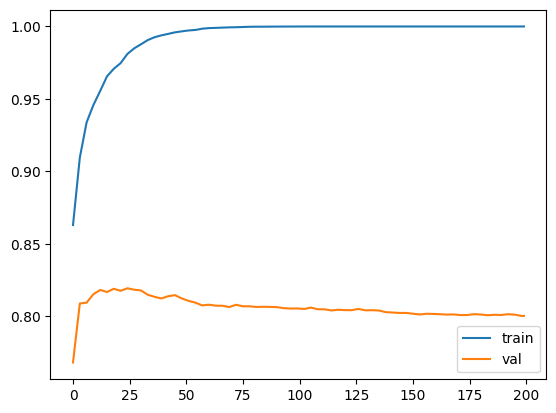

In [68]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()
plt.show()


- val auc

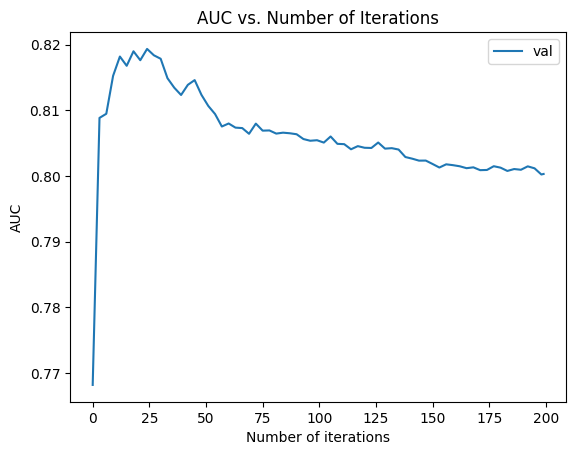

In [69]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('AUC')
plt.title('AUC vs. Number of Iterations')
plt.show()


## 6.8 XGB parameter tunning

Tuning the following parameters:
- eta
- max_depth
- min_child_weight

eta tuning

In [73]:
scores = {} 

In [80]:
%%capture output
# train the model

xgb_params = { 
              'max_depth':4, # size of the tree
              'eta':0.001, # learning rate 
              'min_child_weight':1, #min_samples_leaf_size min no of samples in the leaf node

              'objective':'binary:logistic', # binary classification 
              'nthread':4, # number of threads can parllelize training , no of cpu core 

              'seed':1,
              'verbosity':1, # contril what type of warnings we will receive
           
              'eval_metric':'auc'}

watchlist = [(dtrain,'train'),(dval,'val')]
model = xgb.train(xgb_params, 
                  dtrain,
                  evals = watchlist, 
                  num_boost_round=200)

In [81]:
key = f"eta={xgb_params['eta']}"
scores[key] = parse_xgb_output(output)
scores.keys()

dict_keys(['eta=0.3', 'eta=0.1', 'eta=0.01', 'eta=0.001'])

In [82]:
del scores['eta=0.3']

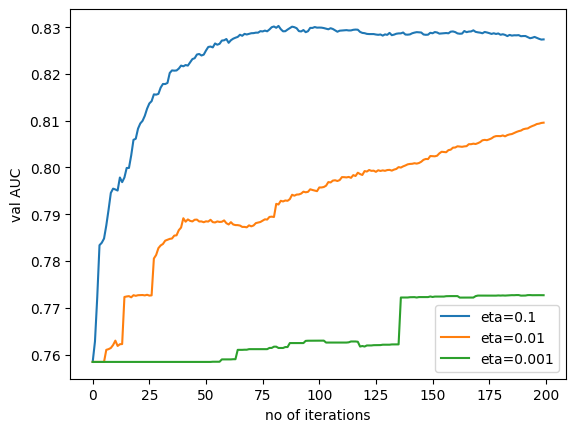

In [83]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label = max_depth)
plt.xlabel("no of iterations")
plt.ylabel("val AUC")
plt.legend()
plt.show()

max_depth tuning

In [84]:
scores = {}

In [89]:
%%capture output

# train the model 
xgb_params = { 
              'max_depth':3, # size of the tree
              'eta':0.01, # learning rate 
              'min_child_weight':1, #min_samples_leaf_size min no of samples in the leaf node

              'objective':'binary:logistic', # binary classification 
              'nthread':4, # number of threads can parllelize training , no of cpu core 

              'seed':1,
              'verbosity':1, # contril what type of warnings we will receive
           
              'eval_metric':'auc'}

watchlist = [(dtrain,'train'),(dval,'val')]
model = xgb.train(xgb_params, 
                  dtrain,
                  verbose_eval = 5,
                  evals = watchlist, 
                  num_boost_round=200)

In [90]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
scores.keys()

dict_keys(['max_depth=7', 'max_depth=5', 'max_depth=3'])

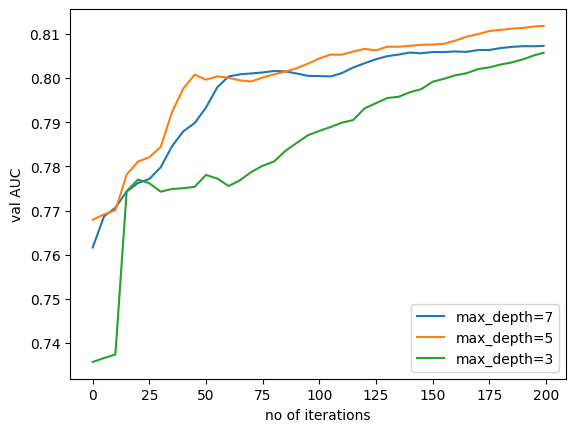

In [92]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label = max_depth)
plt.xlabel("no of iterations")
plt.ylabel("val AUC")
plt.legend()
plt.show()


min_child_weight

In [93]:
scores = {}

In [98]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 30,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [99]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
scores.keys()

dict_keys(['min_child_weight=30', 'min_child_weight=10', 'min_child_weight=1'])

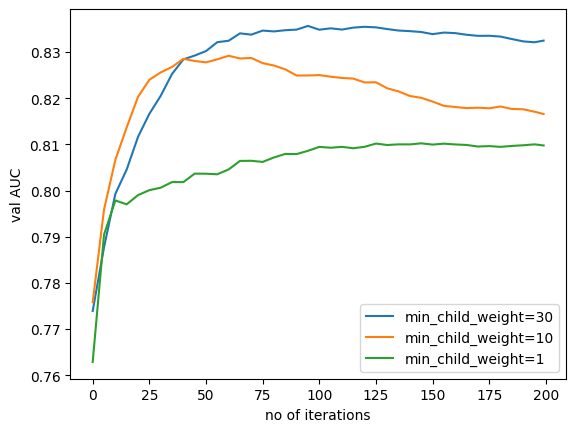

In [100]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
plt.xlabel("no of iterations")
plt.ylabel("val AUC")
plt.legend()
plt.show()

final model after hyperparameterization

In [110]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 7,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

watchlist = [(dtrain,'train'),(dval,'val')] # contains dataset where we want to evaluate our model during train
model = xgb.train(xgb_params, 
                  dtrain,
                  evals = watchlist,
                  verbose_eval = 3, # print output at every 5th step of iteration
                  num_boost_round=100)


In [111]:

df_score = parse_xgb_output(output)
df_score.loc[df_score['val_auc'].idxmax()]

num_iter     75.00000
train_auc     0.90590
val_auc       0.83542
Name: 25, dtype: float64

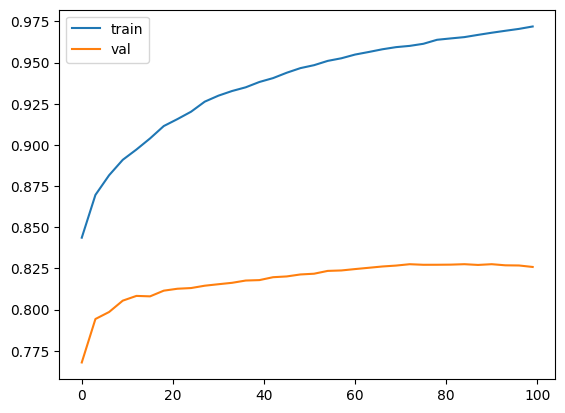

In [103]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()
plt.show()

## 6.9 Selecting the final model
- choosing between xgboost, random forest and decision tree
- Training the final model
- Saving the final model

In [ ]:
dt = DecisionTreeClassifier(max_depth=6,min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [ ]:
rf = RandomForestClassifier(
    n_estimators=200, 
    max_depth=10, 
    min_samples_leaf=3,
    random_state=1
)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [112]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 7,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

watchlist = [(dtrain,'train'),(dval,'val')] # contains dataset where we want to evaluate our model during train
model = xgb.train(xgb_params, 
                  dtrain,
                #   evals = watchlist,
                  verbose_eval = 3, # print output at every 5th step of iteration
                  num_boost_round=100)

In [113]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.7852498123077667

In [114]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.8249709379767989

In [115]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8343858225763484

### Training full dataset with best model(xgboost)

In [116]:
df_full_train= df_full_train.reset_index(drop=True)
df_full_train

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,22,owner,48,48,married,no,fixed,60,110.0,3000.0,0.0,1000,1460
1,default,8,other,60,41,married,no,freelance,45,62.0,0.0,0.0,1800,2101
2,ok,2,parents,36,19,married,no,fixed,35,162.0,4000.0,100.0,400,570
3,ok,1,owner,12,61,married,no,others,45,103.0,20000.0,0.0,300,650
4,ok,13,owner,60,27,married,no,fixed,35,253.0,7000.0,0.0,1060,1750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3558,default,4,owner,60,47,married,no,freelance,75,0.0,13500.0,0.0,1900,1976
3559,ok,2,rent,60,28,single,no,fixed,45,101.0,0.0,0.0,1300,1333
3560,ok,2,parents,36,25,single,no,fixed,35,110.0,0.0,0.0,500,1200
3561,ok,4,other,60,25,single,no,fixed,35,162.0,0.0,0.0,1800,2999


In [117]:
y_full_train = (df_full_train.status == 'default').astype(int).values

In [118]:
np.unique(y_full_train)

array([0, 1])

In [119]:
del df_full_train['status']

In [128]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [130]:
dfulltrain = xgb.DMatrix(X_full_train,label = y_full_train, 
                         feature_names = list(dv.get_feature_names_out())
                         )

dtest = xgb.DMatrix(X_test, 
                    feature_names = list(dv.get_feature_names_out())
                    )

In [131]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 7,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

watchlist = [(dtrain,'train'),(dval,'val')] # contains dataset where we want to evaluate our model during train
model = xgb.train(xgb_params, 
                  dtrain,
                #   evals = watchlist,
                  verbose_eval = 3, # print output at every 5th step of iteration
                  num_boost_round=100)

In [133]:
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.8256866722056595

## 6.10 Summary
- Decision trees learn if-then-else rules from the data.
- Finding the best split: select the least impure split: This algorithm can overfit that's why we control it by limiting it by max depth and size of the group.
- Random forest isa way of combining multiple decision trees. It should have diverse set of models to make good prediction. 
- Gradient boosting trains model sequentially: each model tries to fix errors of the previous model. XGBoost is an implementation of gradient boosting. 